# PCA & LDA on MNIST

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

## 1. Train KNN on MNIST Dataset

In [2]:
train_data = datasets.MNIST(root = './data/02/',
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())
test_data = datasets.MNIST(root = './data/02/',
                            train=False,
                            download=True,
                            transform=transforms.ToTensor())
print('number of training data : ', len(train_data))
print('number of test data : ', len(test_data))

100%|██████████| 9912422/9912422 [00:00<00:00, 68869648.09it/s]


Extracting ./data/02/MNIST/raw/train-images-idx3-ubyte.gz to ./data/02/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 53671109.36it/s]


Extracting ./data/02/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/02/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30439126.94it/s]


Extracting ./data/02/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/02/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9573130.03it/s]

Extracting ./data/02/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/02/MNIST/raw



number of training data :  60000
number of test data :  10000


In [3]:
# 데이터 모양 확인을 위해 dataframe 형태로 변환

feat_cols = ['pixel'+str(i) for i in range(784)]
df_train = pd.DataFrame(train_data.data.reshape(60000,-1).numpy(), columns = feat_cols)
df_test = pd.DataFrame(test_data.data.reshape(10000,-1).numpy(), columns = feat_cols)

df_train.shape, df_test.shape

((60000, 784), (10000, 784))

In [4]:
df_train.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 640x480 with 0 Axes>

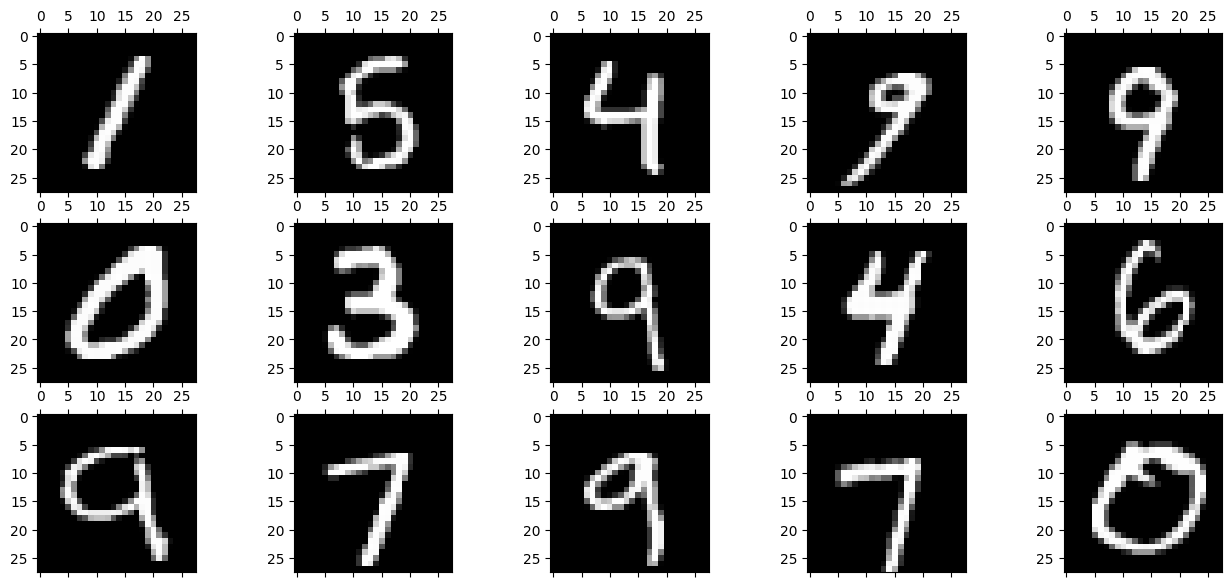

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df_train.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1)
    ax.matshow(df_train.loc[rndperm[i], feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [8]:
# 학습 데이터 준비

import numpy as np

X_train = train_data.data.reshape(60000,-1).numpy()
y_train = train_data.targets.numpy()

X_test = test_data.data.reshape(10000,-1).numpy()
y_test = test_data.targets.numpy()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [9]:
# KNN 학습 - Baseline

from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors= 5)
clf.fit(X_train, y_train)
print('Fit time : ', time.time() - start_time)

Fit time :  0.014926671981811523


In [10]:
from sklearn.metrics import accuracy_score

start_time = time.time()
pred = clf.predict(X_test)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_test, pred))

Fit time :  53.846652030944824
0.9688


## 2. PCA & LDA 적용하기

In [11]:
# PCA 적용

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Initialize PCA, setting the number of components such that 95% of the variance is retained
pca = PCA(n_components=0.95)

# Fit PCA on the training data and transform both training and test data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# KNN classifier using the transformed data
clf_pca = KNeighborsClassifier(n_neighbors=5)
clf_pca.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [12]:
# LDA 적용

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)

In [13]:
X_train_lda.shape

(60000, 9)

In [14]:
lda.explained_variance_ratio_

array([0.2392286 , 0.20180995, 0.17849695, 0.10652571, 0.09406712,
       0.06906025, 0.04973746, 0.03429077, 0.0267832 ])

## 3. 결과 비교하기

In [15]:
# PCA 결과
start_time = time.time()
pred = clf_pca.predict(X_test_pca)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_test, pred))

Fit time :  9.742847204208374
0.9712


In [16]:
# LDA 결과
start_time = time.time()
y_pred = lda.predict(X_test)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_test, y_pred))

Fit time :  0.06869244575500488
0.873


## 4. PCA & LDA 장단점 정리하기

####장단점을 자유롭게 적어주세요!

- PCA
  - 장점: PCA는 비지도학습 기법으로, 탐색적 데이터 분석과 시각화에 유용하게 사용될 수 있다.
  또한, PCA는 데이터의 분산을 최대로 보존하려고 하므로, 데이터의 손실을 최소화하면서 차원을 축소할 수 있다.
  마지막으로 다변량 데이터에서 변수 간 상관관계를 제거할 수 있는데, 이는 데이터 내 숨겨진 구조를 발견하는 데 유용하다.

  - 단점: 클래스 레이블을 고려하지 않기 때문에, 분류 문제에 직접 적용할 때 클래스 간의 구별력을 보장하지 못할 가능성이 있다.
  PCA에 의해 생성된 주성분은 원래 변수의 선형 조합이므로, 원래 변수의 의미를 직접 반영하지 않아 해석하기 어려울 수 있다.

- LDA
  - 장점:LDA는 지도학습 방법으로, 클래스 레이블을 사용하여 데이터를 투영하는 축을 찾는다. 이는 클래스를 잘 구분하는 특징을 추출하는 데 유리하다.
또한, LDA는 클래스 간 분산은 최대화하고 클래스 내부 분산은 최소화하여, 동일 클래스의 데이터는 가깝게, 다른 클래스의 데이터는 멀리 떨어지게 하여 클래스 구별력을 높일 수 있다.
  - 단점: LDA에서 추출할 수 있는 특성의 수는 클래스 수에 의해 제한된다. 또한, LDA는 각 클래스의 데이터가 정규 분포를 따른다고 가정하는데, 이 가정이 맞지 않는 경우 성능이 저하될 수 있다.